In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded1 = drive.CreateFile({'id': '1Ggk2ZQd3LDf9JtZch0k5ux4BoCRjaI00'})
downloaded1.GetContentFile('carvan_train.csv')

downloaded2 = drive.CreateFile({'id': '1dDHjQfjMQn0dZE5eOIKggV24JZmipFbK'})
downloaded2.GetContentFile('carvan_test.csv')


In [6]:
import os
os.listdir()

['.config', 'carvan_test.csv', 'adc.json', 'carvan_train.csv', 'sample_data']

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
path1=r"carvan_train.csv"
path2=r"carvan_test.csv"

#reading training data
bd_train=pd.read_csv(path1)
#reading test data
bd_test=pd.read_csv(path2)

In [0]:
#Now we will concat these datasets for data preprocesssing 
bd_test['V86']=np.NaN
bd_train['data']="train"
bd_test['data']="test"
bd_test=bd_test[bd_train.columns]
bd_all=pd.concat([bd_train,bd_test],axis=0)

In [11]:
bd_all.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,data
0,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,...,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,train
1,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,train
2,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,train
3,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,train
4,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,train


In [12]:
#V86 is our dependent(target) variable
bd_all['V86'].value_counts()

0.0    5474
1.0     348
Name: V86, dtype: int64

In [13]:
#we check for all the columns with their data type and unique values
list(zip(bd_all.columns,bd_all.dtypes,bd_all.nunique()))

[('V1', dtype('int64'), 40),
 ('V2', dtype('int64'), 9),
 ('V3', dtype('int64'), 6),
 ('V4', dtype('int64'), 6),
 ('V5', dtype('int64'), 10),
 ('V6', dtype('int64'), 10),
 ('V7', dtype('int64'), 10),
 ('V8', dtype('int64'), 6),
 ('V9', dtype('int64'), 10),
 ('V10', dtype('int64'), 10),
 ('V11', dtype('int64'), 8),
 ('V12', dtype('int64'), 10),
 ('V13', dtype('int64'), 10),
 ('V14', dtype('int64'), 10),
 ('V15', dtype('int64'), 10),
 ('V16', dtype('int64'), 10),
 ('V17', dtype('int64'), 10),
 ('V18', dtype('int64'), 10),
 ('V19', dtype('int64'), 10),
 ('V20', dtype('int64'), 6),
 ('V21', dtype('int64'), 10),
 ('V22', dtype('int64'), 10),
 ('V23', dtype('int64'), 10),
 ('V24', dtype('int64'), 10),
 ('V25', dtype('int64'), 10),
 ('V26', dtype('int64'), 10),
 ('V27', dtype('int64'), 10),
 ('V28', dtype('int64'), 10),
 ('V29', dtype('int64'), 10),
 ('V30', dtype('int64'), 10),
 ('V31', dtype('int64'), 10),
 ('V32', dtype('int64'), 10),
 ('V33', dtype('int64'), 9),
 ('V34', dtype('int64'), 1

In [14]:
bd_all['V1'].nunique()

40

In [15]:
round(bd_all.groupby("V2")['V86'].mean(),2)

V2
1     0.06
2     0.07
3     0.00
4     0.00
5     0.00
6     0.00
7     0.00
8     0.00
10    0.00
Name: V86, dtype: float64

In [0]:
#In V2 column we only make dummy of 2 values
bd_all['V2_1']=np.where(bd_all['V2']==1,1,0)
bd_all['V2_2']=np.where(bd_all['V2']==2,1,0)
bd_all.drop(['V2'],axis=1,inplace=True)

In [17]:
#these are our categorical columns and we will make dummies of these variables
["V1","V4","V5","V6","V10","V42","V44"]

['V1', 'V4', 'V5', 'V6', 'V10', 'V42', 'V44']

In [18]:
bd_all['V1'].value_counts()

33    1401
38     569
8      546
39     542
9      460
3      433
23     376
36     373
35     362
41     355
34     325
24     324
31     318
13     302
11     286
10     271
32     234
37     233
1      218
6      209
12     194
30     190
22     169
2      148
29     139
40     137
25     129
4       90
26      79
27      77
7       72
5       70
20      42
28      41
21      29
18      27
16      25
17      13
15       7
19       7
Name: V1, dtype: int64

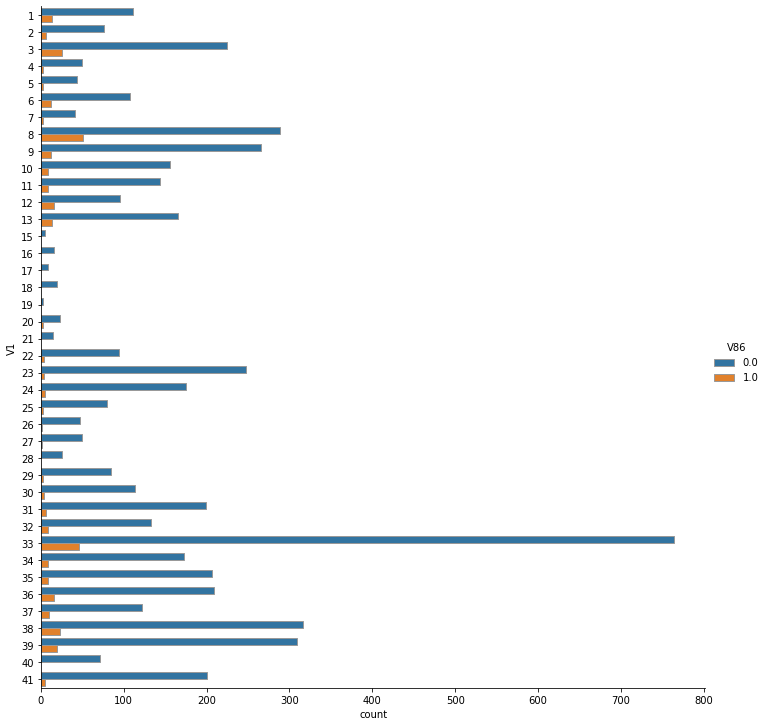

In [19]:
#plt.figure(figsize=(30,9))
sns.catplot(y="V1", hue="V86", kind="count",height=10,
            edgecolor=".6",
            data=bd_all)

# Column V4=Average age:

1 20-30 years
2 30-40 years
3 40-50 years
4 50-60 years
5 60-70 years
6 70-80 years

In [20]:
bd_all['V4'].value_counts()

3    5154
2    2409
4    1777
5     329
1     104
6      49
Name: V4, dtype: int64

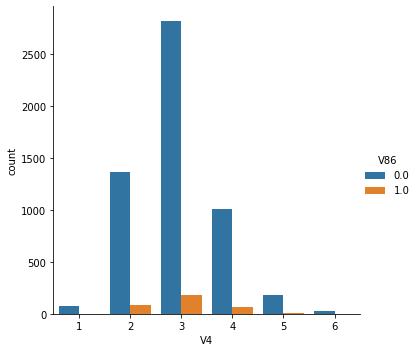

In [21]:
# Lets Visualize Average age V4
sns.catplot(x = "V4",data = bd_all, kind = "count",hue = "V86",height = 5)

# Column V5= Customer Main Type

1 Successful hedonists
2 Driven Growers
3 Average Family
4 Career Loners
5 Living well
6 Cruising Seniors
7 Retired and Religeous
8 Family with grown ups
9 Conservative families
10 Farmers

In [22]:
bd_all['V5'].value_counts()

8     2694
3     1513
9     1111
1      959
5      940
7      881
2      827
10     492
6      326
4       79
Name: V5, dtype: int64

In [23]:
round(bd_all.groupby("V5")['V86'].mean(),3)

V5
1     0.087
2     0.131
3     0.067
4     0.000
5     0.026
6     0.020
7     0.036
8     0.057
9     0.063
10    0.018
Name: V86, dtype: float64

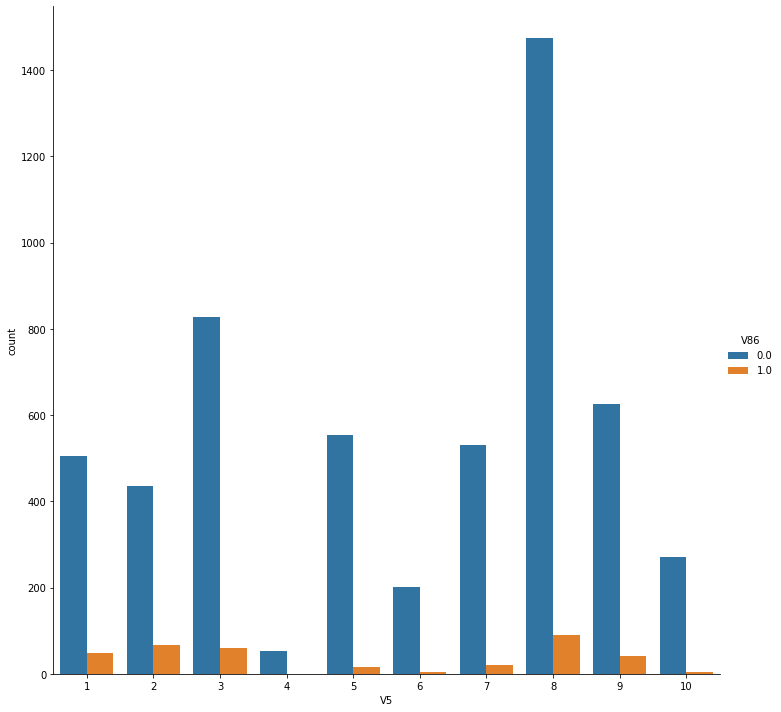

In [24]:
#Lets Visualize V5
sns.catplot(x="V5",kind="count",hue="V86",height=10,data=bd_all)

In [25]:
"V6","V10","V15","V42","V44"

('V6', 'V10', 'V15', 'V42', 'V44')

# Column V6: Roman Catholic

0 0%
1 1 - 10%
2 11 - 23%
3 24 - 36%
4 37 - 49%
5 50 - 62%
6 63 - 75%
7 76 - 88%
8 89 - 99%
9 100%

In [26]:
bd_all['V6'].value_counts()

0    5420
1    2744
2    1213
3     243
4     123
5      30
6      25
7      11
9      10
8       3
Name: V6, dtype: int64

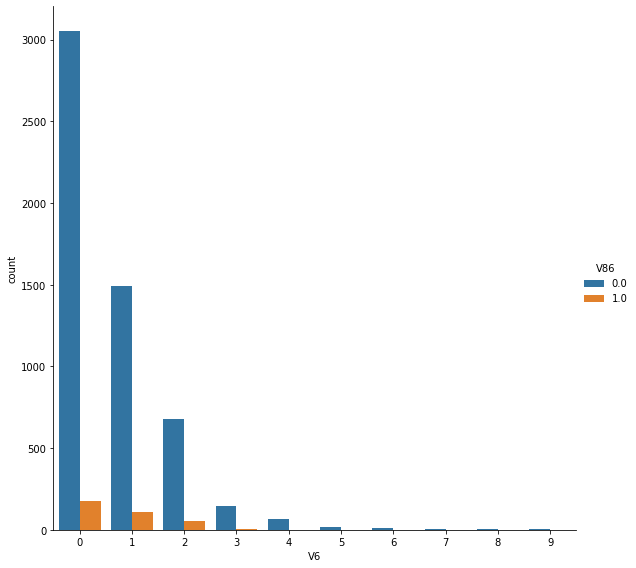

In [27]:
#Lets Visualize column V6
sns.catplot(x="V6",hue="V86",height=8,kind="count",data=bd_all)

In [28]:
#Column V10=Married
bd_all['V10'].value_counts()

7    2800
6    2015
5    1628
9    1345
8     603
4     550
3     402
2     252
1     119
0     108
Name: V10, dtype: int64

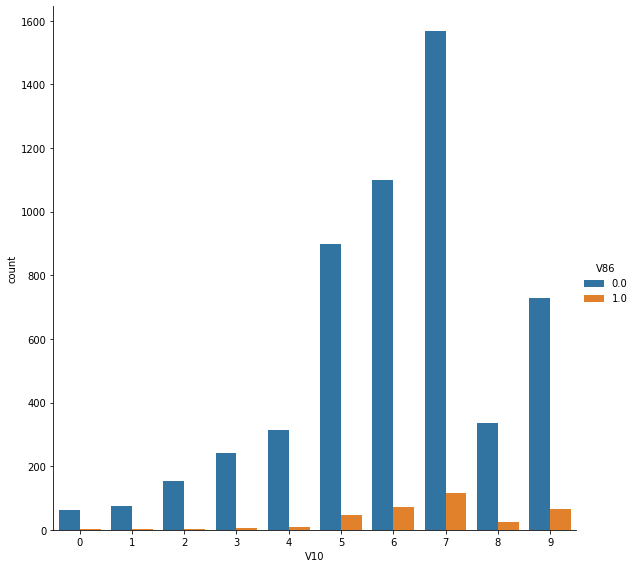

In [29]:
#Let's Visualize column V10
sns.catplot(x="V10",hue="V86",height=8,kind="count",data=bd_all)

In [30]:
#Column V42=Average Income
bd_all['V42'].value_counts()

3    3232
4    3063
5    1268
2    1110
6     646
7     228
8     121
1      78
9      38
0      38
Name: V42, dtype: int64

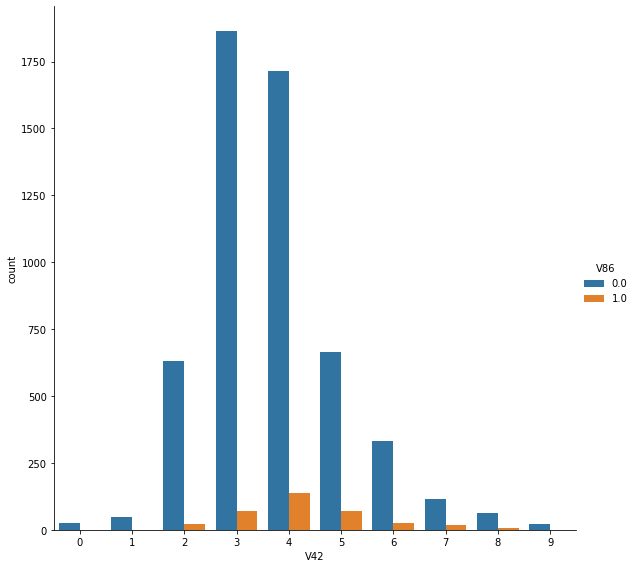

In [31]:
#Let's Visualize column V42
sns.catplot(x="V42",hue="V86",height=8,kind="count",data=bd_all)

In [32]:
#Column V44=Contribution private third party insurance
bd_all['V44'].value_counts()

0    5903
2    3562
1     341
3      16
Name: V44, dtype: int64

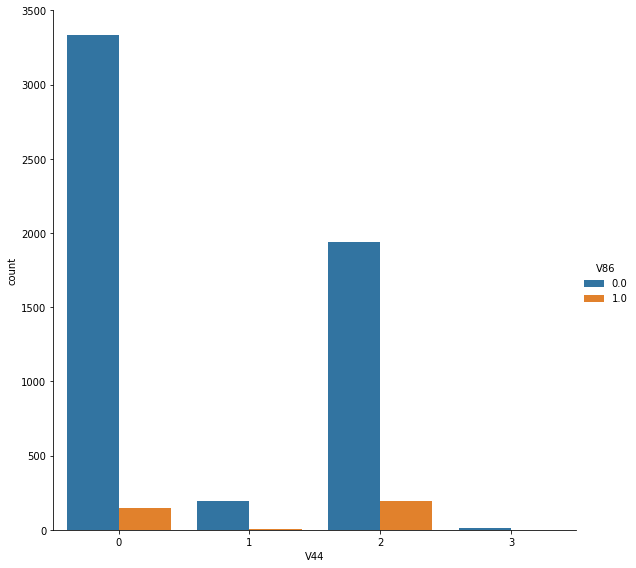

In [33]:
#Let's Visualize column V42
sns.catplot(x="V44",hue="V86",height=8,kind="count",data=bd_all)

In [34]:
#these are our categorical columns and we will make dummies of these variables
["V1","V4","V5","V6","V10","V42","V44"]

['V1', 'V4', 'V5', 'V6', 'V10', 'V42', 'V44']

In [35]:
cat_cols=["V1","V4","V5","V6","V10","V42","V44"]

for col  in cat_cols:
    freqs=bd_all[col].value_counts()
    k=freqs.index[freqs>100][:-1]
    for cat in k:
        name=str(col)+"_"+str(cat)
        bd_all[name]=(bd_all[col]==cat).astype(int)
    del bd_all[col]
    print(col)

V1
V4
V5
V6
V10
V42
V44


In [36]:
bd_all.head()

,V3,V7,V8,V9,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V43,V45,V46,V47,V48,...,V1_6,V1_12,V1_30,V1_22,V1_2,V1_29,V1_40,V4_3,V4_2,V4_4,V4_5,V5_8,V5_3,V5_9,V5_1,V5_5,V5_7,V5_2,V5_10,V6_0,V6_1,V6_2,V6_3,V10_7,V10_6,V10_5,V10_9,V10_8,V10_4,V10_3,V10_2,V10_1,V42_3,V42_4,V42_5,V42_2,V42_6,V42_7,V44_0,V44_2
0,3,5,1,3,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,3,0,0,6,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,4,1,4,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,2,4,2,4,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,4,0,0,6,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3,3,3,2,4,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,0,0,6,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,4,4,1,4,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,3,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [37]:
#Check for Null values in our data
bd_all.isnull().sum()

V3       0
V7       0
V8       0
V9       0
V11      0
        ..
V42_2    0
V42_6    0
V42_7    0
V44_0    0
V44_2    0
Length: 140, dtype: int64

In [0]:
#Impute null values by mean,only in train data 
for col in bd_all.columns:
    if (col not in ['V86','data'])& (bd_all[col].isnull().sum()>0):
        bd_all.loc[bd_all[col].isnull(),col]=bd_all.loc[bd_all['data']=='train',col].mean()

In [39]:
#Data preprocessing is done and now split our data into training and testing 
bd_train=bd_all[bd_all['data']=="train"]
del bd_train['data']
bd_test=bd_all[bd_all['data']=="test"]
bd_test.drop(['V86','data'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
bd_train1,bd_train2=train_test_split(bd_train,test_size=0.2,
                                     random_state=2,
                                     stratify = bd_train["V86"])

In [0]:
#bd_train1=80% data is used for training
#bd_train2=20% data is used for testing and check our model performance on train data

In [0]:
#80% training data
x_train=bd_train1.drop(['V86'],1)
y_train=bd_train1['V86']
#20% testing data
x_test=bd_train2.drop(['V86'],1)
y_test=bd_train2['V86']

# Logistics Regression

In [0]:
#parameters for logistics regression 
params={'class_weight':['balanced',None],
        'penalty':['l1','l2']}

In [0]:
model=LogisticRegression(fit_intercept=True)

In [0]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring="roc_auc")

In [49]:
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [50]:
grid_search.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
logr=grid_search.best_estimator_

In [52]:
#fit on training data 
logr.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
list(zip(x_train.columns,logr.coef_))

[('V3', array([-0.06416538, -0.03407156,  0.0082387 , -0.06568202, -0.06270163,
         -0.01088988, -0.13692767, -0.1427762 , -0.08629165, -0.02358631,
         -0.1431751 , -0.25020866, -0.00173113,  0.05487682, -0.07718497,
          0.09981985,  0.01882539,  0.02016082,  0.10357179,  0.0305153 ,
          0.02751051,  0.15260737, -0.01017824, -0.27530904, -0.27790478,
          0.099242  ,  0.12369775,  0.03682066, -0.20254575, -0.25281423,
          0.03553392,  0.07059271,  0.02551739,  0.14915402, -0.25642716,
          0.07003666, -0.06519063, -0.23626733,  0.2546974 , -0.01485011,
         -0.12511888, -0.24044573,  0.32056773,  0.16670134, -0.50968464,
         -0.14221301, -0.2703396 , -0.05679051,  0.19608161,  0.27954858,
          0.19715831,  0.02222549,  0.39208571, -0.08512309, -0.03176499,
          0.0373237 , -0.0083364 ,  0.14118334, -0.04199228, -0.01272143,
         -0.09375209,  0.37376649, -0.05591454,  0.06962721, -0.40143951,
         -0.2709947 ,  0.0443496

In [0]:
#prediction on 20% splitted test data....y_predicted
train_prediction=logr.predict_proba(x_test)[:,1]
#Real 
real_value=y_test

In [55]:
train_prediction

array([0.05698232, 0.1660042 , 0.0308065 , ..., 0.015779  , 0.12120285,
       0.03572557])

In [0]:
cutoffs=np.linspace(0.01,0.99,99)

In [57]:
KS_all=[]
for cutof in cutoffs:
        predicted=(train_prediction>cutof).astype(int)
        
        TP=((predicted==1) & (real_value==1)).sum()
        TN=((predicted==0) & (real_value==0)).sum()
        FP=((predicted==1) & (real_value==0)).sum()
        FN=((predicted==0) & (real_value==1)).sum()
    
        P=TP+FN
        N=TN+FP
        #KS cutoff
        KS=(TP/P)-(FP/N)
        #Recall
        RK=(TP/(TP+FN))
        #precision
        PR=(TP/(TP+FP))
        #F-beta score (beta=2)
        FB=(1+2**2)*PR*RK/((2**2)*PR+RK)
        print("FB ",FB)
    
        KS_all.append(KS)


FB  0.2753036437246964
FB  0.301556420233463
FB  0.3167420814479639
FB  0.30902348578491967
FB  0.3347280334728034
FB  0.32428355957767724
FB  0.31825795644891125
FB  0.285204991087344
FB  0.27566539923954375
FB  0.2755905511811024
FB  0.26260504201680673
FB  0.25386313465783666
FB  0.2408256880733945
FB  0.23809523809523805
FB  0.24691358024691357
FB  0.2162849872773537
FB  0.20997375328083992
FB  0.20380434782608692
FB  0.1800554016620499
FB  0.15759312320916907
FB  0.15988372093023254
FB  0.1483679525222552
FB  0.13595166163141995
FB  0.1371951219512195
FB  0.1393188854489164
FB  0.14018691588785048
FB  0.12618296529968454
FB  0.11254019292604502
FB  0.09740259740259741
FB  0.09740259740259741
FB  0.08250825082508251
FB  0.06666666666666667
FB  0.03355704697986577
FB  0.01689189189189189
FB  0.01689189189189189
FB  0.017123287671232876
FB  0.01730103806228374
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  nan
FB  n

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


In [58]:
mycutoff=cutoffs[KS_all==max(KS_all)][0]
mycutoff

0.05

In [59]:
lm_hardclasses = (train_prediction>mycutoff).astype(int)
lm_hardclasses

array([1, 1, 0, ..., 0, 1, 0])

# Let's build confusion matrix

In [0]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(real_value,lm_hardclasses)

array([[706, 389],
       [ 22,  48]])

In [62]:
#Another way of building confusion matrix
pd.crosstab(real_value,lm_hardclasses)

col_0,0,1
V86,,
0.0,706,389
1.0,22,48


In [63]:
#Accuracy on train data
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,train_prediction)

0.7114220482713632

In [0]:
#We got 72% accuracy on train data,This is too low so now we will move to another algorithms

In [0]:
#Now we build our model on whole data
#we split our whole training data into predictors and target
X_TRAIN=bd_train.drop(['V86'],axis=1)
Y_TRAIN=bd_train['V86']

In [66]:
#fit on whole train data
logr.fit(X_TRAIN,Y_TRAIN)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Prediction on whole test data
test_prediction=logr.predict_proba(bd_test)[:,1]

In [68]:
test_prediction

array([0.01384861, 0.27801531, 0.07522126, ..., 0.1782738 , 0.08879775,
       0.09083468])

In [0]:
test_classes=(test_prediction>mycutoff).astype(int)

In [0]:
pd.DataFrame(test_prediction).to_csv("MYLOGISTICSREG.csv",index=False)

In [0]:
from sklearn.metrics import fbeta_score

In [71]:
#Fbeta Score
fbeta_score(y_test,lm_hardclasses,beta=2)

0.3347280334728034

# Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [0]:
#Random Forest classifier
RFModel=RandomForestClassifier()


In [0]:
#parameters for random forest 
param_dist = {"n_estimators":[100,200,300,500,700,1000],
              "max_features": [5,10,20,25,30,35],
              "bootstrap": [True, False],
              'class_weight':[None,'balanced'], 
               'criterion':['entropy','gini'],
               'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                }



In [75]:
n_iter_search=10
random_search=RandomizedSearchCV(RFModel,param_dist,n_iter=n_iter_search,scoring='roc_auc',cv=10)
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [0]:
rf_model=random_search.best_estimator_

In [77]:
#Fit 80% splitted train data using random search best estimator
rf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features=35,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf_train_predicted = rf_model.predict_proba(x_test)[:,1]
real=y_test

In [0]:
cutoffs=np.linspace(0.01,0.99,99)

In [0]:
KS_all = []
for cutoff in cutoffs:
    predicted = (rf_train_predicted>cutoff).astype(int)
    
    TP = ((predicted==1) & (real==1)).sum()
    TN = ((predicted==0) & (real==0)).sum()
    FP = ((predicted==1) & (real==0)).sum()
    FN = ((predicted==0) & (real==1)).sum()
    
    P = TP + FN
    N = TN + FP
    
    KS = (TP/P)-(FP/N)
    KS_all.append(KS)

In [81]:
mycutoff = cutoffs[KS_all == max(KS_all)][0]
mycutoff

0.06999999999999999

In [0]:
rf_hardclasses = (rf_train_predicted > mycutoff).astype(int)

In [0]:
df = pd.DataFrame(list(zip(real,rf_hardclasses)),columns=["Real","Predicted"])


In [84]:
#Lets build confusion matrix
pd.crosstab(df["Real"], df["Predicted"])

Predicted,0,1
Real,,
0.0,802,293
1.0,25,45


In [146]:
confusion_matrix(y_test,rf_hardclasses)

array([[802, 293],
       [ 25,  45]])

In [85]:
#Accuracy
roc_auc_score(real,rf_hardclasses)

0.6876386170906719

In [107]:
#F-beta score
fbeta_score(y_test,rf_hardclasses,beta=2)

0.3640776699029127

In [87]:
#Fit on whole training data
rf_model.fit(X_TRAIN,Y_TRAIN)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features=35,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
test_score=rf_model.predict_proba(bd_test)[:,1]
test_classes=(test_score>mycutoff).astype(int)
pd.DataFrame(test_classes).to_csv("RANDOMFORESTSolution.csv",index=False)

# Gradient Boosting Machines


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

In [0]:
model=GradientBoostingClassifier()

In [0]:
gbm_params={'n_estimators':[100,200,500],
            'learning_rate':[0.01,0.05,0.1,0.4,0.8,1],
              'max_depth':[1,2,3,4,5,6],
               'subsample':[0.5,0.8,1],
               'max_features':[5,10,15,20,25]}

In [0]:
random_search=RandomizedSearchCV(model,param_distributions=gbm_params,cv=10,n_iter=10,n_jobs=-1,
                                scoring='roc_auc',verbose=False)

In [93]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                   

In [0]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [95]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.773 (std: 0.04274)
Parameters: {'subsample': 0.5, 'n_estimators': 200, 'max_features': 15, 'max_depth': 3, 'learning_rate': 0.05}

Model with rank: 2
Mean validation score: 0.771 (std: 0.04757)
Parameters: {'subsample': 1, 'n_estimators': 100, 'max_features': 25, 'max_depth': 1, 'learning_rate': 0.05}

Model with rank: 3
Mean validation score: 0.769 (std: 0.03917)
Parameters: {'subsample': 1, 'n_estimators': 200, 'max_features': 15, 'max_depth': 3, 'learning_rate': 0.05}

Model with rank: 4
Mean validation score: 0.767 (std: 0.04732)
Parameters: {'subsample': 0.5, 'n_estimators': 200, 'max_features': 15, 'max_depth': 6, 'learning_rate': 0.01}

Model with rank: 5
Mean validation score: 0.757 (std: 0.03952)
Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_features': 10, 'max_depth': 1, 'learning_rate': 0.4}



In [98]:
gbm=random_search.best_estimator_
gbm


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=15, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [99]:
gbm.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=15, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
gbm_train_predicted = gbm.predict_proba(x_test)[:,1]
real=y_test

In [0]:
cutoffs=np.linspace(0.01,0.99,99)

In [0]:
KS_all = []
for cutoff in cutoffs:
    predicted = (rf_train_predicted>cutoff).astype(int)
    
    TP = ((predicted==1) & (real==1)).sum()
    TN = ((predicted==0) & (real==0)).sum()
    FP = ((predicted==1) & (real==0)).sum()
    FN = ((predicted==0) & (real==1)).sum()
    
    P = TP + FN
    N = TN + FP
    
    KS = (TP/P)-(FP/N)
    KS_all.append(KS)

In [111]:
mycutoff = cutoffs[KS_all == max(KS_all)][0]
mycutoff

0.06999999999999999

In [112]:
gbm_hardclasses = (gbm_train_predicted > mycutoff).astype(int)
gbm_hardclasses

array([0, 1, 0, ..., 0, 1, 0])

In [116]:
roc_auc_score(y_test,gbm_train_predicted)

0.741611219830398

In [117]:
#Lets build confusion matrix
pd.crosstab(df["Real"], df["Predicted"])

Predicted,0,1
Real,,
0.0,802,293
1.0,25,45


In [118]:
fbeta_score(y_test,gbm_hardclasses,beta=2)#f-beta score for beta=2

0.33333333333333337

In [119]:
#Fit on whole training data
gbm.fit(X_TRAIN,Y_TRAIN)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=15, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
test_score=gbm.predict_proba(bd_test)[:,1]
test_classes=(test_score>mycutoff).astype(int)
pd.DataFrame(test_classes).to_csv("GBMSolution.csv",index=False)

# XGBOOST

In [0]:
from xgboost.sklearn import XGBClassifier

In [0]:
xgb_params = {  
                "learning_rate":[0.01,0.05,0.1,0.3,0.5],
                "gamma":[i/10.0 for i in range(0,5)],#change in ginni index
                "max_depth": [2,3,4,5,6,7,8],
                "min_child_weight":[1,2,5,10],#no of samples falling in each node
                "max_delta_step":[0,1,2,5,10],#control the upcoming updates
                "subsample":[i/10.0 for i in range(5,10)],#percentages of data points in each tree
                "colsample_bytree":[i/10.0 for i in range(5,10)],#how many columns in one tree goes
                "colsample_bylevel":[i/10.0 for i in range(5,10)],#
                "reg_lambda":[1e-5, 1e-2, 0.1, 1, 100], #control penarization factor
                "reg_alpha":[1e-5, 1e-2, 0.1, 1, 100],
                "scale_pos_weight":[1,2,3,4,5,6,7,8,9],
                "n_estimators":[100,500,700,1000]
             }

In [123]:
5*5*7*4*5*5*5*5*5*5*9*4

393750000

In [0]:
xgb=XGBClassifier(objective='binary:logistic')


In [0]:
n_iter=10

random_search=RandomizedSearchCV(xgb,n_jobs=-1,cv=5,n_iter=n_iter,scoring='roc_auc',
                                 param_distributions=xgb_params)

In [136]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'max_delta_step': [0, 1, 2, 5, 10],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         

In [137]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.770 (std: 0.02645)
Parameters: {'subsample': 0.7, 'scale_pos_weight': 8, 'reg_lambda': 100, 'reg_alpha': 100, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 6, 'max_delta_step': 1, 'learning_rate': 0.3, 'gamma': 0.1, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.8}

Model with rank: 2
Mean validation score: 0.766 (std: 0.02889)
Parameters: {'subsample': 0.9, 'scale_pos_weight': 6, 'reg_lambda': 1e-05, 'reg_alpha': 100, 'n_estimators': 1000, 'min_child_weight': 5, 'max_depth': 6, 'max_delta_step': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.8}

Model with rank: 3
Mean validation score: 0.765 (std: 0.03423)
Parameters: {'subsample': 0.6, 'scale_pos_weight': 1, 'reg_lambda': 100, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 3, 'max_delta_step': 1, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.8}

Model with rank: 4
Mean va

In [138]:
xgb_best=random_search.best_estimator_
xgb_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.1,
              learning_rate=0.3, max_delta_step=1, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=100, reg_lambda=100, scale_pos_weight=8, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [139]:
xgb_best.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.1,
              learning_rate=0.3, max_delta_step=1, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=100, reg_lambda=100, scale_pos_weight=8, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [141]:
xgb_train_prediction=xgb_best.predict_proba(x_test)[:,1]
xgb_train_prediction

array([0.31908792, 0.55503273, 0.15913653, ..., 0.23048818, 0.5411056 ,
       0.22108056], dtype=float32)

In [143]:
roc_auc_score(y_test,xgb_train_prediction)

0.7493998695368559

# KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier


In [148]:
knn=KNeighborsClassifier(n_neighbors=5,weights='distance')
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [0]:
knn_train_prediction=knn.predict(x_test)

In [154]:
knn_train_prediction

array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
from sklearn.metrics import accuracy_score

In [156]:
accuracy_score(y_test,knn_train_prediction)

0.9296137339055794

In [157]:
roc_auc_score(y_test,knn_train_prediction)

0.5078930202217873

# Naive Bayes

In [0]:
from sklearn.naive_bayes import BernoulliNB

In [0]:
gnb=BernoulliNB()

In [165]:
gnb.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [0]:
gnb_predict=gnb.predict(x_test)

In [167]:
accuracy_score(y_test,gnb_predict)

0.8515021459227468

In [168]:
roc_auc_score(y_test,gnb_predict)

0.6201239399869537